## **Part A**
• DOMAIN: Digital content and entertainment industry.

• CONTEXT: The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.

• DATA DESCRIPTION: The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

• PROJECT OBJECTIVE: To Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments 

## Steps and tasks:

1.Import and analyse the data set.

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Analyze the dataset
print('Number of training samples:', len(X_train))
print('Number of testing samples:', len(X_test))

# Concatenate the training and testing sets
data = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Find the unique classes and their counts
unique_classes, class_counts = np.unique(targets, return_counts=True)

# Print the class distribution
class_distribution = dict(zip(unique_classes, class_counts))
print('Class Distribution:', class_distribution)


Number of training samples: 25000
Number of testing samples: 25000
Class Distribution: {0: 25000, 1: 25000}


### 2.Perform relevant sequence padding on the data.

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Perform sequence padding
X_train = pad_sequences(X_train, maxlen=300)
X_test = pad_sequences(X_test, maxlen=300)

# Check the shape of the padded sequences
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)


Shape of X_train: (25000, 300)
Shape of X_test: (25000, 300)


3.Perform following data analysis:

• Print shape of features and labels

In [9]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)



Shape of X_train: (25000, 300)
Shape of y_train: (25000,)
Shape of X_test: (25000, 300)
Shape of y_test: (25000,)


### • Print value of any one feature and it's label

In [10]:
print('Feature:', X_train[10])
print('Label:', y_train[10])


Feature: [   6  346  137   11    4 2768  295   36 7740  725    6 3208  273   11
    4 1513   15 1367   35  154    2  103    2  173    7   12   36  515
 3547   94 2547 1722    5 3547   36  203   30  502    8  361   12    8
  989  143    4 1172 3404   10   10  328 1236    9    6   55  221 2989
    5  146  165  179  770   15   50  713   53  108  448   23   12   17
  225   38   76 4397   18  183    8   81   19   12   45 1257    8  135
   15    2  166    4  118    7   45    2   17  466   45    2    4   22
  115  165  764 6075    5 1030    8 2973   73  469  167 2127    2 1568
    6   87  841   18    4   22    4  192   15   91    7   12  304  273
 1004    4 1375 1172 2768    2   15    4   22  764   55 5773    5   14
 4233 7444    4 1375  326    7    4 4760 1786    8  361 1236    8  989
   46    7    4 2768   45   55  776    8   79  496   98   45  400  301
   15    4 1859    9    4  155   15   66    2   84    5   14   22 1534
   15   17    4  167    2   15   75   70  115   66   30  252    7  6

### Class Distribution Analysis: Analyze the distribution of positive and negative reviews in the dataset.

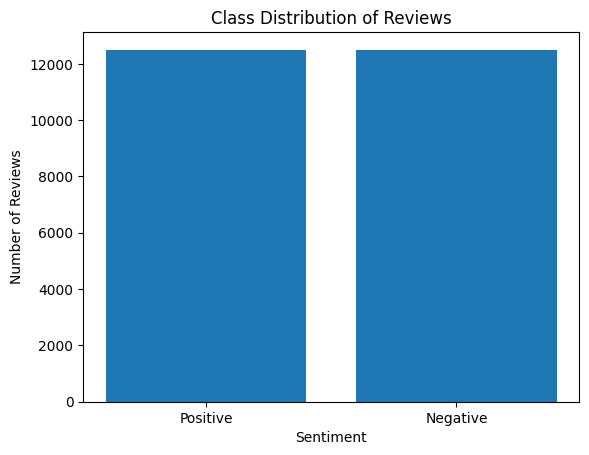

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Count the number of positive and negative reviews
positive_count = np.sum(y_train)
negative_count = len(y_train) - positive_count

# Visualize the class distribution
plt.bar(['Positive', 'Negative'], [positive_count, negative_count])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Class Distribution of Reviews')
plt.show()


### Review Length Analysis: Analyze the lengths of the reviews in terms of the number of words.

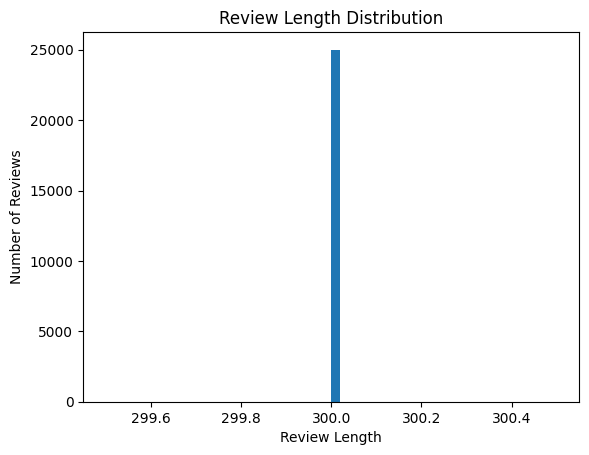

In [12]:
review_lengths = [len(review) for review in X_train]

# Plot a histogram of review lengths
plt.hist(review_lengths, bins=50)
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.title('Review Length Distribution')
plt.show()


### Vocabulary Size Analysis: Analyze the size and frequency distribution of the vocabulary.

In [13]:
# Determine the vocabulary size
vocabulary_size = len(np.unique(np.hstack(X_train)))

# Print the vocabulary size
print("Vocabulary Size:", vocabulary_size)


Vocabulary Size: 9999


### Word Frequency Analysis: Analyze the frequency distribution of words in the dataset.

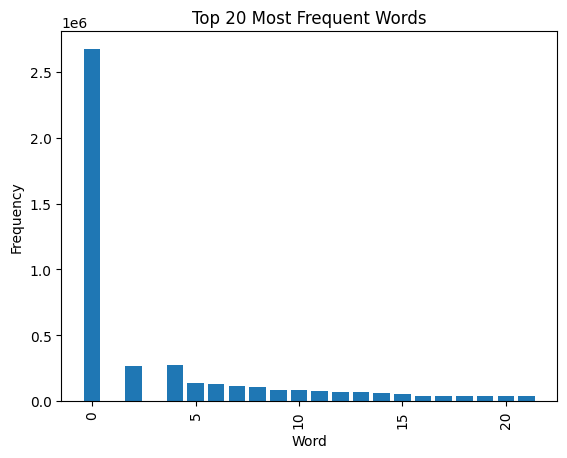

In [14]:
# Flatten the list of reviews into a single list of words
words = [word for review in X_train for word in review]

# Count the frequency of each word
word_counts = np.unique(words, return_counts=True)

# Sort the words based on their frequency
sorted_indices = np.argsort(word_counts[1])[::-1]
sorted_words = word_counts[0][sorted_indices]
sorted_counts = word_counts[1][sorted_indices]

# Plot the top 20 most frequent words
plt.bar(sorted_words[:20], sorted_counts[:20])
plt.xticks(rotation='vertical')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.show()


### Sentiment Distribution: Analyze the distribution of sentiment (positive/negative) in the dataset.

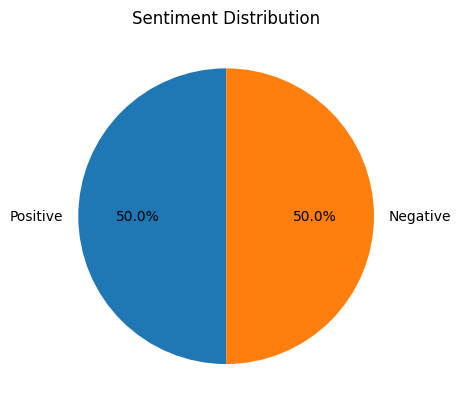

In [15]:
# Count the number of positive and negative reviews
positive_count = np.sum(y_train)
negative_count = len(y_train) - positive_count

# Plot the sentiment distribution
plt.pie([positive_count, negative_count], labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()


### Review Length vs. Sentiment: Analyze the relationship between review length and sentiment.

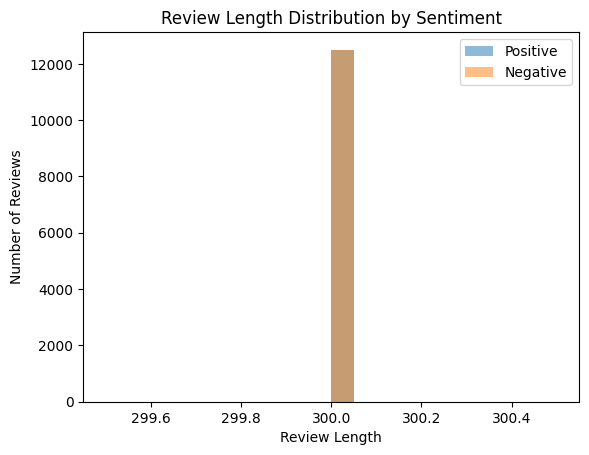

In [16]:
positive_lengths = [len(X_train[i]) for i in range(len(X_train)) if y_train[i] == 1]
negative_lengths = [len(X_train[i]) for i in range(len(X_train)) if y_train[i] == 0]

# Plot review length distribution for positive and negative reviews
plt.hist(positive_lengths, bins=20, alpha=0.5, label='Positive')
plt.hist(negative_lengths, bins=20, alpha=0.5, label='Negative')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.title('Review Length Distribution by Sentiment')
plt.legend()
plt.show()


4.Decode the feature value to get original sentence

In [17]:
from tensorflow.keras.datasets import imdb

# Combine the training and testing sets
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Get the word-to-index mapping
word_index = imdb.get_word_index()

# Reverse the word-to-index mapping
index_to_word = {index: word for word, index in word_index.items()}

# Decode the feature value at index 10
decoded_sentence = ' '.join(index_to_word.get(index, '?') for index in X[10])

print('Decoded Sentence:', decoded_sentence)


1641221/1641221 [==============================] - 0s 0us/step
Decoded Sentence: is men go this of wing american from russo moving is accepted put this of jerry for places so work and watch and lot br that from sometimes wondered make department introduced to wondered from action at turns in low that in gay i'm of chemistry bible i i simply alive it is time done inspector to watching look world named for more tells up many fans are that movie music her get grasp but seems in people film that if explain in why for and find of where br if and movie throughout if and of you best look red startling to recently in successfully much unfortunately going dan and stuck is him sequences but of you of enough for its br that beautiful put reasons of chris chemistry wing and for of you red time trivia to as companion payoff of chris less br of subplots torture in low alive in gay some br of wing if time actual in also side any if name takes for of friendship it of 10 for had and great to as you stu

In [18]:
def decoded_review(X,y):

  word_idx = imdb.get_word_index()#dictionary that contains mapping of words to their index in the IMDB dataset

  word_idx = {k: (v+3) for k,v in word_idx.items()}
  word_idx['<PAD>'] = 0 #This token is used to pad variable length sequences to a fixed length
  word_idx['<START>'] = 1 #This token is used to indicate the start of a sentence or a sequence.
  word_idx['<UNK'] = 2 #This token is used to represent unknown words or tokens that are not present in the vocabulary.
  word_idx['<UNUSED'] = 3 #This token is used to represent unused or rare words.

  word_idx_1 = {i: w for w, i in word_idx.items()}
  words = (' '.join(word_idx_1[i] for i in X if i!=0))
  print(f'Review: {words}')
  print(f'Actual Sentiment: {y}')
  return word_idx, word_idx_1

word_index, word_index_1 = decoded_review(X_train[3], y_train[3])

Review: it has a rough beauty and authenticity <UNK with some of the finest <UNK singing you will ever hear br br <UNK <UNK visits his grandfather in hospital shortly before his death he burns with frustration part of him <UNK to be in the twenty first century to hang out in <UNK but he is raised on the western <UNK among a <UNK speaking community br br yet there is a deeper conflict within him he <UNK to know the truth the truth behind his <UNK ancient stories where does fiction end and he wants to know the truth behind the death of his parents br br he is pulled to make a last <UNK journey to the <UNK of one of <UNK most <UNK mountains can the truth be told or is it all in stories br br in this story about stories we <UNK bloody battles <UNK lovers the <UNK of old and the sometimes more <UNK <UNK of accepted truth in doing so we each connect with <UNK as he lives the story of his own life br br <UNK the <UNK <UNK is probably the most honest <UNK and genuinely beautiful film of scotla

In [19]:
y_train[3]

1

5.Design, train, tune and test a sequential model.

In [21]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding, TimeDistributed, Flatten, GRU

# Load the IMDB dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Perform sequence padding
maxlen = 300
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Define the model
vocab_size = 10000
embedding_dim = 100

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(LSTM(units=60, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(100)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 5
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=2)

# Tune the model by experimenting with different hyperparameters, architectures, etc.

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/5
391/391 - 70s - loss: 0.3605 - accuracy: 0.8283 - val_loss: 0.2841 - val_accuracy: 0.8824 - 70s/epoch - 180ms/step
Epoch 2/5
391/391 - 29s - loss: 0.1835 - accuracy: 0.9282 - val_loss: 0.2995 - val_accuracy: 0.8768 - 29s/epoch - 74ms/step
Epoch 3/5
391/391 - 19s - loss: 0.0851 - accuracy: 0.9684 - val_loss: 0.4292 - val_accuracy: 0.8674 - 19s/epoch - 48ms/step
Epoch 4/5
391/391 - 12s - loss: 0.0262 - accuracy: 0.9910 - val_loss: 0.7194 - val_accuracy: 0.8590 - 12s/epoch - 31ms/step
Epoch 5/5
391/391 - 14s - loss: 0.0176 - accuracy: 0.9938 - val_loss: 0.7202 - val_accuracy: 0.8633 - 14s/epoch - 35ms/step
782/782 [==============================] - 5s 6ms/step - loss: 0.7202 - accuracy: 0.8633
Test Loss: 0.7202048301696777
Test Accuracy: 0.863319993019104


In [22]:
import matplotlib.pyplot as plt 

def learning_curve(hist, epochs):

  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, hist.history['accuracy'])
  plt.plot(epoch_range, hist.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()


  plt.plot(epoch_range, hist.history['loss'])
  plt.plot(epoch_range, hist.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

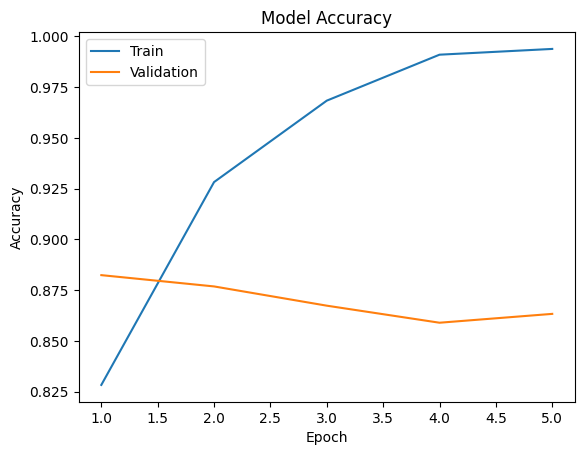

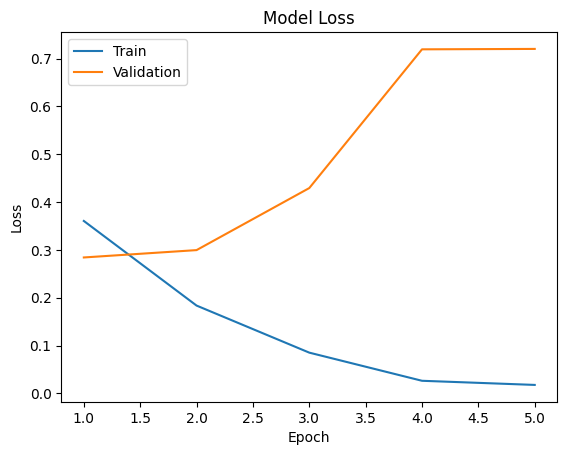

In [24]:
import matplotlib.pyplot as plt

def learning_curve(hist, epochs):
    epoch_range = range(1, epochs+1)
    
    # Plot accuracy
    plt.plot(epoch_range, hist.history['accuracy'])
    plt.plot(epoch_range, hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss
    plt.plot(epoch_range, hist.history['loss'])
    plt.plot(epoch_range, hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Assuming you have already trained the model and have the 'hist' object
epochs = 5  # Number of epochs used during training
learning_curve(hist, 5)


In [25]:
scores, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Score: {:.4f}".format(scores))
print("Accuracy: {:.4f}".format(accuracy))


Score: 0.7202
Accuracy: 0.8633


6.Use the designed model to print the prediction on any one sample.

In [26]:
y_pred = model.predict(X_test)
decoded_review(X_test[30],y_test[30])
print(f'Predicted sentiment: {y_pred[20][0]}')

782/782 [==============================] - 5s 5ms/step
Review: <START> tim robbins did a masterful job directing this film i say this because he avoided convention and cliché he also <UNK superb performances from susan sarandon who won an oscar for her role and sean penn even more amazing robbins doesn't <UNK he just tells the story and lets the events play on the viewer's mind this is so effective because it allows the viewer to form his own opinions on the death penalty one of the most controversial subjects of our time without being unfairly manipulated in either direction i can't recommend this film enough 9 10
Actual Sentiment: 1
Predicted sentiment: 1.0


## **Part B**
### • **DOMAIN**: Social media analytics

### • **CONTEXT**: Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

### • **DATA DESCRIPTION**: The dataset is collected from two news websites, theonion.com and huffingtonpost.com. This new dataset has the following advantages over the existing Twitter datasets: Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings. Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets. Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the real sarcastic elements.

### **Content**: Each record consists of three attributes: is_sarcastic: 1 if the record is sarcastic otherwise 0.

### headline: the headline of the news article

### article_link: link to the original news article. Useful in collecting supplementary data

Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection

• PROJECT OBJECTIVE: Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.

### **Steps and tasks:**

1.Read and explore the data

In [25]:
import json
import pandas as pd

data = []
file_name = '/Sarcasm_Headlines_Dataset.json'

with open(file_name, encoding='latin-1') as f:
  for line in f:
    doc = json.loads(line)
    lst = [doc['is_sarcastic'],doc['headline'], doc['article_link']]
    data.append(lst) 

In [26]:
data

[[1,
  'thirtysomething scientists unveil doomsday clock of hair loss',
  'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205'],
 [0,
  'dem rep. totally nails why congress is falling short on gender, racial equality',
  'https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207'],
 [0,
  'eat your veggies: 9 deliciously different recipes',
  'https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html'],
 [1,
  'inclement weather prevents liar from getting to work',
  'https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031'],
 [1,
  "mother comes pretty close to using word 'streaming' correctly",
  'https://www.theonion.com/mother-comes-pretty-close-to-using-word-streaming-cor-1819575546'],
 [0,
  'my white inheritance',
  'https://www.huffingtonpost.com/entry/my-white-inheritance_us_59230747e4b07617ae4cbe1a'],
 [0,
  '5 ways to file your taxes with less stres

2.Retain relevant columns

In [27]:
cols = ['sentiment','headline', 'article_link']
df = pd.DataFrame(data=data, columns=cols)

In [28]:
df.head()

,sentiment,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sentiment     28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB
None


In [30]:
df.isnull().sum()

sentiment       0
headline        0
article_link    0
dtype: int64

In [31]:
df.nunique()

sentiment           2
headline        28503
article_link    28617
dtype: int64

In [32]:
df.duplicated().sum()

2

In [33]:
df.sentiment.value_counts()

0    14985
1    13634
Name: sentiment, dtype: int64

Dropping aticle_link as it is not required

In [34]:
df.drop('article_link', inplace= True, axis = 1)
df.head()

,sentiment,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [35]:
df['headline'][10]

'this lesbian is considered a father in indiana (and an amazing one at that)'

Cleaning headline columns since text includes special characters

In [36]:
import nltk
import re
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

def cleantext(text):
  text = re.sub(r'\d+', '', text)
  text = "".join([char for char in text if char not in string.punctuation])
  return text

df['headline']=df['headline'].apply(cleantext)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
df['headline'][10]

'this lesbian is considered a father in indiana and an amazing one at that'

3.Get length of each sentence

In [38]:
df['sentence_len'] = df['headline'].str.len()
df.head()

,sentiment,headline,sentence_len
0,1,thirtysomething scientists unveil doomsday clo...,61
1,0,dem rep totally nails why congress is falling ...,77
2,0,eat your veggies deliciously different recipes,47
3,1,inclement weather prevents liar from getting t...,52
4,1,mother comes pretty close to using word stream...,59


In [39]:
max_len = max([len(text) for text in df['headline']])
max_len

910

4.Define parameters

In [40]:
max_features = 10000
maxlen = 300
embedding_size = 200

6.Get indices for words

In [41]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_features,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(df['headline'])

In [42]:
indices = tokenizer.texts_to_sequences(df['headline'])
indices

[[331, 3065, 6217, 2291, 2, 660, 1120],
 [7226, 1706, 718, 3066, 46, 223, 10, 1858, 1048, 7, 1636, 2074, 1707],
 [877, 34, 597, 1426],
 [1575, 6218, 4439, 14, 138, 1, 143],
 [434, 460, 280, 980, 1, 549, 598, 4056, 6219],
 [78, 69, 8727],
 [252, 1, 4057, 34, 2418, 9, 550, 1483],
 [1780, 3067, 1087, 24, 216, 24, 1576, 2, 1378, 3260, 4058],
 [2876, 287, 138, 129, 1781, 1, 417, 4, 1536, 334, 2419],
 [2877, 2, 133, 108, 20, 7227],
 [20, 2548, 10, 3068, 6, 445, 4, 3479, 8, 64, 945, 43, 15, 23],
 [7228, 607, 59, 505, 222, 10, 6, 608, 3261],
 [33, 1, 108, 1637, 5, 1088],
 [551, 1537, 925, 142, 81, 72, 1, 1638, 5, 8728, 7229, 2, 1121, 2],
 [1484, 4059, 11, 6220, 23, 1427, 7, 8729],
 [1340, 359, 7230, 8730, 4900, 77, 14, 12, 1639, 7231, 2075],
 [48, 390, 1122, 3262],
 [48, 13, 299, 96, 2, 30, 2420, 18],
 [526, 54, 404, 9, 3263, 323],
 [3741, 2878, 94, 56, 1, 2421, 17, 1, 399, 34, 488, 247],
 [1428, 373, 4, 24, 4060, 2, 1429, 770, 3069],
 [1577, 4, 126, 184, 217, 4901, 1193, 1, 2006, 3264, 378, 7

6.Create features and labels

In [43]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['sentiment'])

In [44]:
print("Number of Samples:", len(X))
print(X[10])
print("Number of Labels: ", len(y))
print(y[10])

Number of Samples: 28619
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

7.Get vocabulary size

In [45]:
vocab_size=len(tokenizer.word_index)
print (vocab_size)

28846


8.Create a weight matrix using GloVe embeddings

In [47]:
#using "glove.6B.200d.txt" since we have defined embedding dimension size of 200

glove_file = "/glove.6B.200d.txt"

embeddings = {}

for line in open(glove_file):
  word = line.split(" ")[0]
  embed = line.split(" ")[1:]
  embed = np.asarray(embed, dtype = 'float32')
  embeddings[word] = embed

In [50]:
embedding_dim = 200
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None and len(embedding_vector) == embedding_dim:
        embedding_matrix[i] = embedding_vector



In [51]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57345998,  0.54170001, -0.23477   , ...,  0.54417998,
        -0.23069   ,  0.34946999],
       [ 0.052924  ,  0.25426999,  0.31353   , ..., -0.086254  ,
        -0.41916999,  0.46496001],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

9.Define and compile a Bidirectional LSTM model.

In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model

input_layer = Input(shape=(maxlen,), dtype=tf.int64)
embed = Embedding(embedding_matrix.shape[0], output_dim=200, weights=[embedding_matrix], input_length=maxlen, trainable=True)(input_layer)
lstm = Bidirectional(LSTM(128))(embed)
drop = Dropout(0.3)(lstm)
dense = Dense(100, activation='relu')(drop)
out = Dense(2, activation='softmax')(dense)

model = Model(input_layer, out)
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 200)          5769200   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              336896    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 100)               25700     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                             

10.Fit the model and check the validation accuracy

Creating train and test data using train_test_split



Epoch 1/5
458/458 [==============================] - 43s 71ms/step - loss: 0.4271 - accuracy: 0.7973 - val_loss: 0.3462 - val_accuracy: 0.8588
Epoch 2/5
458/458 [==============================] - 17s 37ms/step - loss: 0.2403 - accuracy: 0.9035 - val_loss: 0.3343 - val_accuracy: 0.8590
Epoch 3/5
458/458 [==============================] - 14s 31ms/step - loss: 0.1388 - accuracy: 0.9488 - val_loss: 0.3997 - val_accuracy: 0.8564
Epoch 4/5
458/458 [==============================] - 15s 33ms/step - loss: 0.0808 - accuracy: 0.9716 - val_loss: 0.5129 - val_accuracy: 0.8485
Epoch 5/5
458/458 [==============================] - 17s 37ms/step - loss: 0.0465 - accuracy: 0.9835 - val_loss: 0.5649 - val_accuracy: 0.8443


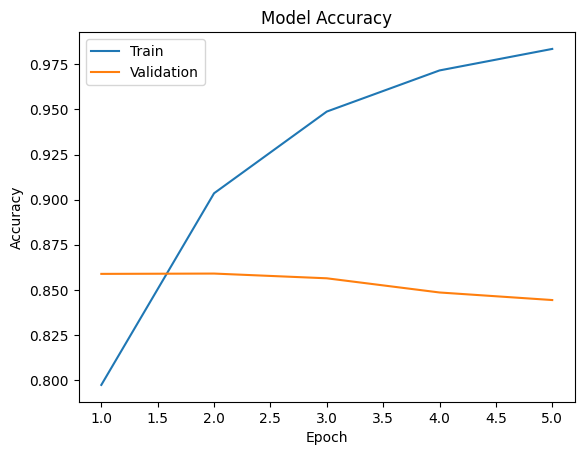

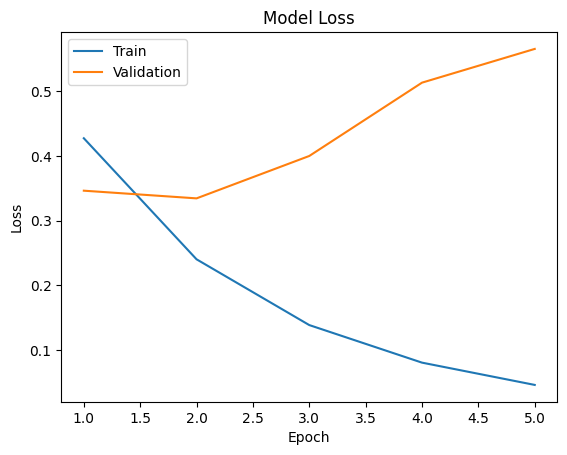

Test Score: 0.5649
Test Accuracy: 0.8443
179/179 [==============================] - 2s 8ms/step
Confusion Matrix:
[[2576  401]
 [ 490 2257]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      2977
           1       0.85      0.82      0.84      2747

    accuracy                           0.84      5724
   macro avg       0.84      0.84      0.84      5724
weighted avg       0.84      0.84      0.84      5724



In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Fit the model
history = model.fit(X_train, y_train, batch_size=50, validation_data=(X_test, y_test), epochs=5, verbose=1)

# Plot learning curve
def learning_curve(hist, epochs):
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, hist.history['accuracy'])
    plt.plot(epoch_range, hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(epoch_range, hist.history['loss'])
    plt.plot(epoch_range, hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

learning_curve(history, 5)

# Evaluate the model on the test set
scores, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Score: {:.4f}".format(scores))
print("Test Accuracy: {:.4f}".format(accuracy))

# Make predictions on the test set
y_pred = model.predict(np.array(X_test), verbose=1)
y_pred = [1 if j > i else 0 for i, j in y_pred]

# Calculate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)
